# Deep Learning Neural Network Tuning Demonstration: a) Kernel_Initializer,   b) Activation_Function, c) HiddenLayerSize&Neurons,d) Batch_Size, e)Epochs

**--------------------------------------------------------------------------------------------------------------------------**
**--------------------------------------------------------------------------------------------------------------------------**
**--------------------------------------------------------------------------------------------------------------------------**
**---------------------------------------------------**


**STRUCTURE**

*In this notebook, the use of GridSearchCV for deep learning neural network hyperparameter tuning is demonstrated. Determining the optimal hyperparameters of a ML model is important as they can affect its training performance and its ability to correctly classify new inputs. The first step is to import the dataset (breast_cancer dataset) and to perform all necessary tasks with respect to the records/values of the independent (inputs) and the dependent (output) features (rescaling,reshaping,input-output feature selection,splitting into train/test set --> data preparation/preprocessing stage). The next step is to build the deep learning model or estimator (use of tensorflow.keras). In terms of the model hyperparameters,for each parameter that is to be tuned ( a) weight initialization, b) activation function, c) hidden layer size & neurons, d) batch_size & e) epochs ) different inputs/values are provided. The role of Grid Search is to try to fit the model to the train samples by 'examining' all possible  combinations of the specified hyperparameters inputs/values so as to evaluate the model performance and select the best values based on the model accuracy (applying cross-validation '5-fold CV').* 

*The classification capabilities of the deep learning model are assessed in the final step of this demonstration. By using the 'predict' GridSearchCV option, the test samples become the new model inputs and the model uses the best parameters from Grid Search to predict their classes (Classification performance metrics (sklearn.metrics): Classification Report, Confusion Matrix & Accuracy Score).*


**The Dataset for this demonstration has been imported from sklearn.datasets ("load_breast_cancer")**




In [1]:
# Importing libraries/packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the dataset from sklearn.datasets
from sklearn.datasets import load_breast_cancer
dataset=load_breast_cancer()
# Dataset conversion to pandas dataframe
df = pd.DataFrame(data= np.c_[dataset['data'], dataset['target']],
                 columns= dataset['feature_names'].tolist() + ['target'])

In [3]:
# Dataset first 5 records 
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [4]:
# Dataset Info: 569 records, 31 columns, no missing entries,Dtype:float64
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

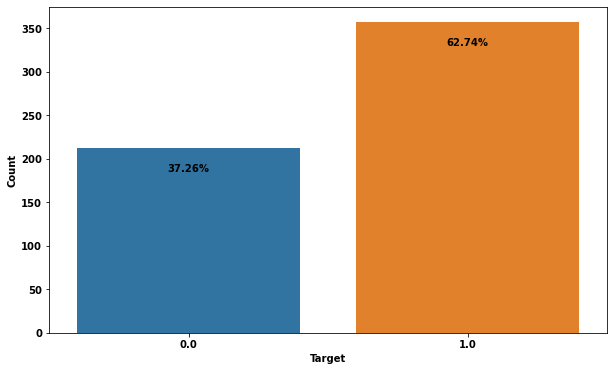

In [5]:
# Due to the binary nature of the dependent(output) parameter 'target'(Benign:0,Malignant:1), the sns.countplot is 
# employed to observe the count & percentage of each sub-group with respect to the total values of the df['target'] column.
plt.figure(figsize=(10,6))
plt.rcParams['font.weight']='bold'
total = len(df['target'])
count_target=sns.countplot(x='target',data=df)
plt.xlabel('Target',fontweight='bold')
plt.ylabel('Count',fontweight='bold')
for p in count_target.patches:
    count_target.annotate('{:.2f}%'.format(100*p.get_height()/total), (p.get_x() + p.get_width() / 2., p.get_height()), 
                               ha = 'center', va = 'center', xytext = (0, -20), textcoords = 'offset points')

In [6]:
# Selecting the independent(inputs) & the dependent(output) parameters that are to be used for the training of the 
# Deep Neural Netmork model
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [7]:
# Inputs/Output shape
print(X.shape,y.shape)

(569, 30) (569,)


In [8]:
# Splitting the dataset (train samples,test samples(0.2 --> 20% of len(df)))
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [9]:
# Shape of train & test samples
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(455, 30) (455,)
(114, 30) (114,)


In [10]:
# Since rescaling is to be applied (MinMaxScaler: range(0,1)), the loop determines the dataset features where rescaling is
# to be applied
sc_in=[]
for i in range(0,df.shape[1]):
        if df.iloc[:,i].min()<0 or df.iloc[:,i].max()>1:
            sc_in.append(i)
sc_in

[0, 1, 2, 3, 10, 11, 12, 13, 20, 21, 22, 23, 25, 26]

In [11]:
# Importing the MinMaxScaler from sklearn.preprocessing
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
# MinMaxScaler is used to transform dataset columns by scaling them between 0 & 1.Training samples are first fitted 
# and then transformed, whereas the test samples are transformed based on the previously fitted training samples in order
# to avoid forecasting with a biased ML model. In this case, the features with indices the values of sc_in list are rescaled
X_train[:,sc_in] = scaler.fit_transform(X_train[:,sc_in])
X_test[:,sc_in] = scaler.transform(X_test[:,sc_in])  

In [12]:
# Importing the necessary classifier,model,layers to create the deep learning model
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
# Importing GridSearchCV to enable the tuning of the deep learning model hyperparameters
from sklearn.model_selection import GridSearchCV
import tensorflow as tf

In [13]:
# Function to build the neural network
def dnn_model(layers,activation,init):
    tf.random.set_seed(0)
    np.random.seed(0)
    model = Sequential()
    for x, neurons in enumerate(layers):
        if x==0:
            model.add(Dense(neurons,input_dim=X_train.shape[1],kernel_initializer=init))
            model.add(Activation(activation))
        else:
            model.add(Dense(neurons,kernel_initializer=init))
            model.add(Activation(activation))
    model.add(Dense(1,activation='sigmoid')) 
    
    model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
    return model
    
model = KerasClassifier(build_fn=dnn_model, verbose=0)


In [14]:
# Selecting different parameter inputs for each model hyperparameter to apply grid search
# The deep learning model parameters that are to be tuned are: a)number of hidden layers & number of neurons,b) activation
# function, c) weight initialization (kernel_initializer),d) batch_size and e) number of epochs
hiddenlayers=[(30), (30,15), (30,15,7)]
act_fun = ['sigmoid', 'relu']
kernelinit=['GlorotUniform','HeUniform']
parameters = dict(layers=hiddenlayers, activation=act_fun,init=kernelinit, batch_size = [4,8,16], epochs=[50,100])
grid_search = GridSearchCV(estimator=model, param_grid=parameters,refit=True,cv=5)

In [15]:
# fitting the model to the train samples
gridsearch_res = grid_search.fit(X_train, y_train)

In [16]:
# All the available information/options that can be provided in terms of the outcome of the grid search
grid_search.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_activation', 'param_batch_size', 'param_epochs', 'param_init', 'param_layers', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [17]:
# Observing the scores for all different combinations of grid search
parameters=gridsearch_res.cv_results_['params']
mean_score = gridsearch_res.cv_results_['mean_test_score']
mean_score=mean_score.round(6)
for mean_sc,  parameter in zip(mean_score, parameters):
    print('Mean_Sc:{}-->{}'.format(mean_sc, parameter))

Mean_Sc:nan-->{'activation': 'sigmoid', 'batch_size': 4, 'epochs': 50, 'init': 'GlorotUniform', 'layers': 30}
Mean_Sc:0.967033-->{'activation': 'sigmoid', 'batch_size': 4, 'epochs': 50, 'init': 'GlorotUniform', 'layers': (30, 15)}
Mean_Sc:0.962637-->{'activation': 'sigmoid', 'batch_size': 4, 'epochs': 50, 'init': 'GlorotUniform', 'layers': (30, 15, 7)}
Mean_Sc:nan-->{'activation': 'sigmoid', 'batch_size': 4, 'epochs': 50, 'init': 'HeUniform', 'layers': 30}
Mean_Sc:0.967033-->{'activation': 'sigmoid', 'batch_size': 4, 'epochs': 50, 'init': 'HeUniform', 'layers': (30, 15)}
Mean_Sc:0.962637-->{'activation': 'sigmoid', 'batch_size': 4, 'epochs': 50, 'init': 'HeUniform', 'layers': (30, 15, 7)}
Mean_Sc:nan-->{'activation': 'sigmoid', 'batch_size': 4, 'epochs': 100, 'init': 'GlorotUniform', 'layers': 30}
Mean_Sc:0.967033-->{'activation': 'sigmoid', 'batch_size': 4, 'epochs': 100, 'init': 'GlorotUniform', 'layers': (30, 15)}
Mean_Sc:0.967033-->{'activation': 'sigmoid', 'batch_size': 4, 'epochs

In [18]:
# Grid Search : Best Score & Best Parameters
print('Best Score: {}'.format(gridsearch_res.best_score_))
print('\r')
print('Best DNN Model Param: {}'.format(gridsearch_res.best_params_))

Best Score: 0.9736263751983643

Best DNN Model Param: {'activation': 'relu', 'batch_size': 4, 'epochs': 100, 'init': 'GlorotUniform', 'layers': (30, 15)}


In [19]:
# Predicting the class of the test samples
prediction = grid_search.predict(X_test)
# first 5 predictions
prediction[:5]

array([[0.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [20]:
# Since its binary classification, if ypred > 0.5 then class 1 else class 0
ypred=prediction>0.5
ypred[:5]

array([[False],
       [ True],
       [ True],
       [ True],
       [ True]])

In [21]:
# Importing classification report, confusion matrix and accuracy
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [22]:
#Classification Report
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

         0.0       0.90      0.98      0.94        47
         1.0       0.98      0.93      0.95        67

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.95       114
weighted avg       0.95      0.95      0.95       114



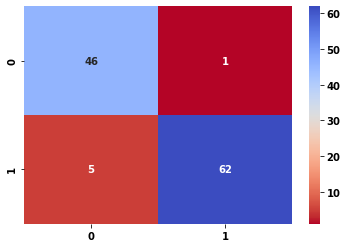

In [23]:
#Confusion Matrix
from matplotlib import cm
cmap = cm.coolwarm
cmap_rev = cm.get_cmap('coolwarm_r')
plt.plot(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,ypred),annot=True,cmap=cmap_rev);

In [24]:
# Accuracy on the test set
print(accuracy_score(y_test,ypred))

0.9473684210526315
